# Basic imports

In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Loading data

In [2]:
f = files.upload()

Saving heart.csv to heart (2).csv


In [3]:
df = pd.read_csv(io.StringIO(f['heart.csv'].decode('utf-8')), sep=",")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [6]:
df["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

# Scaling and training SVC (GridSearchCV)

In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [8]:
X = df.drop("output", axis=1)
y = df["output"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(242, 13)
(61, 13)


In [10]:
svc = SVC(random_state=42)

In [11]:
svc_param_grid = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'kernel': ('linear', 'rbf', 'poly'),
}

In [12]:
gcv = GridSearchCV(
    estimator=svc,
    param_grid=svc_param_grid,
)

In [13]:
%%time
gcv.fit(X_train_scaled, y_train)

CPU times: user 16.4 s, sys: 38.5 ms, total: 16.5 s
Wall time: 27 s


GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
                         'kernel': ('linear', 'rbf', 'poly')})

In [14]:
gcv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [15]:
gcv.best_score_

0.8224489795918368

In [16]:
best_svc = SVC(**gcv.best_params_).fit(X_train_scaled, y_train)

In [17]:
y_pred_svc = best_svc.predict(X_test_scaled)
y_pred_svc.shape

(61,)

In [18]:
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)

In [19]:
print(accuracy_score(y_test, y_pred_svc))
print(f1_score(y_test, y_pred_svc))
print(roc_auc_score(y_test, y_pred_svc))
print()
print(classification_report(y_test, y_pred_svc, digits=4))

0.8688524590163934
0.870967741935484
0.8701508620689655

              precision    recall  f1-score   support

           0     0.8387    0.8966    0.8667        29
           1     0.9000    0.8438    0.8710        32

    accuracy                         0.8689        61
   macro avg     0.8694    0.8702    0.8688        61
weighted avg     0.8709    0.8689    0.8689        61



<Axes: >

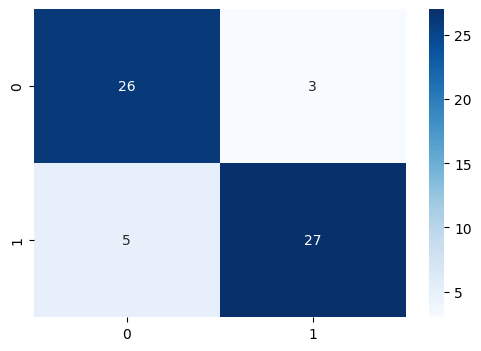

In [20]:
f, ax = plt.subplots(1,1,figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="g", ax=ax)

# Training SVC (RandomizedSearchCV)

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
rcv = RandomizedSearchCV(
    estimator=svc,
    param_distributions=svc_param_grid,
)

In [23]:
%%time
rcv.fit(X_train_scaled, y_train)

CPU times: user 14.6 s, sys: 53.4 ms, total: 14.6 s
Wall time: 23 s


RandomizedSearchCV(estimator=SVC(random_state=42),
                   param_distributions={'C': [0.0001, 0.001, 0.1, 1, 10, 100,
                                              1000],
                                        'kernel': ('linear', 'rbf', 'poly')})

In [24]:
rcv.best_score_

0.8139455782312925

In [25]:
rcv.best_params_

{'kernel': 'linear', 'C': 1}

In [26]:
best_svc_rcv = SVC(**rcv.best_params_).fit(X_train_scaled, y_train)

In [27]:
y_pred_svc_rcv = best_svc_rcv.predict(X_test_scaled)
y_pred_svc_rcv.shape

(61,)

In [28]:
print(accuracy_score(y_test, y_pred_svc_rcv))
print(f1_score(y_test, y_pred_svc_rcv))
print(roc_auc_score(y_test, y_pred_svc_rcv))
print()
print(classification_report(y_test, y_pred_svc_rcv, digits=4))

0.8688524590163934
0.875
0.8685344827586206

              precision    recall  f1-score   support

           0     0.8621    0.8621    0.8621        29
           1     0.8750    0.8750    0.8750        32

    accuracy                         0.8689        61
   macro avg     0.8685    0.8685    0.8685        61
weighted avg     0.8689    0.8689    0.8689        61



<Axes: >

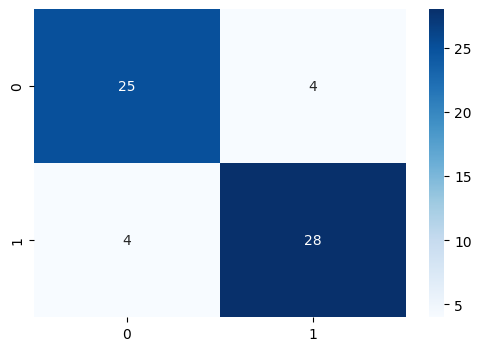

In [29]:
f, ax = plt.subplots(1,1,figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_svc_rcv)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="g", ax=ax)

# Automate multi-model training and tuning

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
def train_multi_models(models_grid, X, y):
    result_scores = []
    for model, grid in models_grid.items():
        gcv = GridSearchCV(
            estimator=model,
            param_grid=grid,
            cv=5,
        )
        gcv.fit(X, y)
        result_scores.append({
            "model": model,
            "score": gcv.best_score_,
            "params": gcv.best_params_,
        })
    best = sorted(result_scores, key=lambda x: x["score"], reverse=True)[0]
    print(f"Best score: {best['score']}")
    return best["model"].set_params(**best["params"])

In [39]:
models_with_parameters = {
    SVC(): {'C': [0.1, 1, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']},
    KNeighborsClassifier(): {'n_neighbors': [3, 5, 7],'weights': ['uniform', 'distance']},
}

In [40]:
best_model = train_multi_models(models_with_parameters, X_train_scaled, y_train)

Best score: 0.8224489795918368


In [43]:
best_model.fit(X_train_scaled, y_train)

SVC(C=1)

In [44]:
y_pred_best = best_model.predict(X_test_scaled)
y_pred_best.shape

(61,)

In [45]:
print(accuracy_score(y_test, y_pred_best))
print(f1_score(y_test, y_pred_best))
print(roc_auc_score(y_test, y_pred_best))
print()
print(classification_report(y_test, y_pred_best, digits=4))

0.8688524590163934
0.870967741935484
0.8701508620689655

              precision    recall  f1-score   support

           0     0.8387    0.8966    0.8667        29
           1     0.9000    0.8438    0.8710        32

    accuracy                         0.8689        61
   macro avg     0.8694    0.8702    0.8688        61
weighted avg     0.8709    0.8689    0.8689        61



<Axes: >

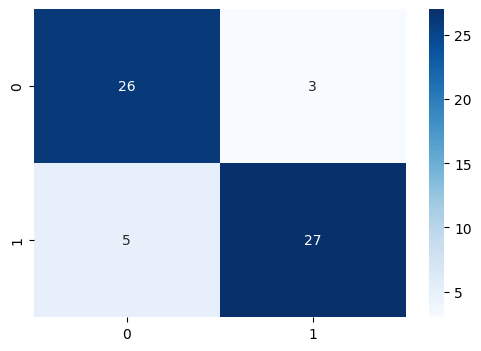

In [46]:
f, ax = plt.subplots(1,1,figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, cmap='Blues', annot=True, fmt="g", ax=ax)